### Table of Contents
* Imports
* Data manipulation and analysis for wages data
* Data visualization, statistics, and write-up of analysis for wages data
* Data manipulation and analysis for employment numbers data
* Data visualization, statistics, and write-up of analysis for employment numbers data

### Imports

In [2]:
# Imports dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from textwrap import wrap

In [13]:
# Paths to the datasets required for analysis
wages = "../census_summary_and_employment/Outputs/wage_data.csv"
employment = "../census_summary_and_employment/Outputs/employment_numbers.csv"
census = "../census_summary_and_employment/Outputs/census_data.csv"

### Data manipulation and analysis for wages data

In [4]:
# Reads the wages data into a DataFrame
wages_df = pd.read_csv(wages, dtype={'NOC Major Group': object, 'NOC Minor Group': object, 'National Occupational Classification (NOC)': object, 
                               'Economic region code': np.int64, 'Economic region name': object, 'Minimum wage': np.float64, 
                               'Median wage': np.float64, 'Maximum wage': np.float64})

# Selects major group 22, since Major Group is the smallest split in both datasets and 22=Technical occupations related to natural and applied sciences
wages_filtered = wages_df.loc[wages_df['NOC Major Group'] == '22'].reset_index(drop=True)

# Shows the dataframe
wages_filtered.head()


,NOC Major Group,NOC Minor Group,NOC Title,Economic region code,Economic region name,Minimum wage,Median wage,Maximum wage
0,22,2211,Chemical technologists and technicians,3510,Ottawa,NaN,NaN,NaN
1,22,2211,Chemical technologists and technicians,3515,Kingston--Pembroke,18.0,28.00,45.19
2,22,2211,Chemical technologists and technicians,3520,Muskoka--Kawarthas,18.0,28.00,45.19
3,22,2211,Chemical technologists and technicians,3530,Toronto,17.0,25.96,38.46
4,22,2211,Chemical technologists and technicians,3540,Kitchener--Waterloo--Barrie,16.0,29.00,45.19


In [5]:
# Groups the data by economic region, since that's the smallest grouping that's in both datasets
wages_grouped = wages_filtered.groupby(['Economic region code'])

## Gets stats for min, max, and average media wage for each economic region for graphing
# Finds min of mins
Minimum_Wage = wages_grouped["Minimum wage"].min()
# Finds mean of medians
Average_Median_Wage = wages_grouped["Median wage"].mean()
# Finds max of maxes
Maximum_Wage = wages_grouped["Maximum wage"].max()
# Finds stdev of average median wage
Stdev_med_wage = wages_grouped["Median wage"].std()
# Finds stdev of average median wage
Stdev_min_wage = wages_grouped["Minimum wage"].std()
# Finds stdev of average median wage
Stdev_max_wage = wages_grouped["Maximum wage"].std()
# Finds averages of max and min wages 
Average_min_max = wages_grouped[["Minimum wage", "Maximum wage"]].mean()

## Sets up a new dataframe to show stats for each economic region
# Takes Economic region code and name, and removes duplicates
summary_df = wages_filtered[['Economic region code', 'Economic region name']].drop_duplicates(keep='first')
# Adds summary columns
summary_df = summary_df.merge(Minimum_Wage, on='Economic region code')
summary_df = summary_df.merge(Average_Median_Wage, on='Economic region code')
summary_df = summary_df.merge(Maximum_Wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_min_wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_med_wage, on='Economic region code')
summary_df = summary_df.merge(Stdev_max_wage, on='Economic region code')
summary_df = summary_df.merge(Average_min_max, on='Economic region code')

# Renames columns
summary_df = summary_df.rename(columns={'Minimum wage_x': 'Minimum Wage', 'Median wage_x': "Average Median Wage", 'Maximum wage_x': "Maximum Wage", "Minimum wage_y":"Minimum Wage StDev", "Maximum wage_y":"Maximum Wage StDev" ,"Median wage_y":"Median Wage StDev", "Minimum wage": 'Average Minimum Wage', "Maximum wage": "Average Maximum Wage"})

# Shows the dataframe
summary_df

,Economic region code,Economic region name,Minimum Wage,Average Median Wage,Maximum Wage,Minimum Wage StDev,Median Wage StDev,Maximum Wage StDev,Average Minimum Wage,Average Maximum Wage
0,3510,Ottawa,15.0,32.063333,65.93,3.757295,5.536724,9.302812,20.986667,45.314762
1,3515,Kingston--Pembroke,15.0,30.676667,58.48,2.727379,4.887484,7.473141,19.964667,42.824000
2,3520,Muskoka--Kawarthas,16.0,28.925000,52.00,2.641913,4.833502,7.134455,19.142000,41.535000
3,3530,Toronto,16.0,32.157143,96.15,3.529929,5.390597,13.717059,20.387500,49.028571
4,3540,Kitchener--Waterloo--Barrie,15.8,31.069500,96.15,3.955876,5.373450,13.025610,20.795000,48.021500
5,3550,Hamilton--Niagara Peninsula,15.0,32.496364,96.15,4.556641,5.432012,12.958103,21.723182,48.061364
6,3560,London,15.0,30.772105,58.48,3.355934,5.269138,7.783255,20.612105,44.480000
7,3570,Windsor--Sarnia,15.0,29.220667,55.00,2.667580,5.366881,8.517807,20.173333,43.568667
8,3580,Stratford--Bruce Peninsula,16.0,30.389091,72.27,2.634526,6.417754,11.071963,19.124545,46.638182
9,3590,Northeast,15.0,31.754375,68.00,3.495179,6.285308,10.599986,21.483125,47.205000


## Data visualization, statistics, and write-up of analysis for wages data
* Visualization and Statistics for Wage of Technical occupations related to natural and applied sciences by Economic Region

## Limitations
* Stats Canada has only summary data for wage numbers available (maximum, minimum, and median for each job in each economic region)
    * This means that the error is not fully correct, nor are the ANOVAs, but is the best I could do with the data I had access to 
    * ANOVAs are based on the averages of each provided set of values for the set of NOC minor level jobs belonging to each NOC major level classification
* Job bands are wide, so many different individual jobs are included in this dataset but not stratified
    * There could be differences at the NOC minor group level that are not apparent at the NOC major group level
    * While NOC minor group level is represented in the wage dataset, it is not represented in the employment numbers dataset
        * NOC major level was used so as to better compare wages with job opportunities
* This data is from 2021
    * During COVID, many tech/ IT jobs moved to primarily woork from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This data documents wages of individuals living in each economic region
        * This does not have information on what companies they work for, where those companies are based, or whether they are working from home remotely
        * **Therefore, differences between economic regions may appear smaller based on this dataset than they would be in a comparison of employees working for companies based in each economic region**

## Analysis
* **There is no significant difference between the average median, maximum, or minimum wage of individual tech jobs related to natural and applied sciences in different economic regions in Ontario**
    * p-values are 0.63 between the average of the minimum wages, 0.48 between the average of the maximum wages, and 0.55 between the average of the median wages 
* The absolute maximum wage possible for this jobset in Ontario is the highest in three economic regions:
    * Toronto
    * Kitchener-Waterloo-Barrie
    * Hamilton-Niagara-Peninsula
* Not enough data is available to tell how to obtain the highest paying jobs in the noted economic regions above
* The absolute minimum wage possible for this jobset in Ontario is very similar among all economic regions

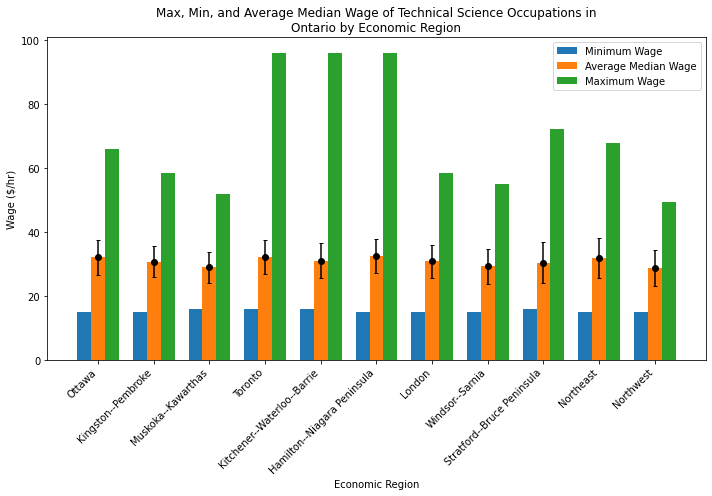

The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.796743349868663, pvalue=0.6319804761577644)
The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.9635777558398096, pvalue=0.4769788544874015)
The ANOVA results for minimum wages of NOC major group by economic region in Ontario are F_onewayResult(statistic=0.8793911833429731, pvalue=0.5536477054835411)


In [6]:
### Plots the Min, Max, and Average of the Median Wage by economic region
# Sets up labels
labels = summary_df['Economic region name']
# Sets up label locations on x-axis
x_axis = np.arange(len(labels))
# Sets up bar width
width = 0.25

# Sets up the chart
plt.figure(figsize=(10, 7))
plt.bar(x_axis - width, summary_df['Minimum Wage'], width, label='Minimum Wage')
plt.bar(x_axis, summary_df['Average Median Wage'], width, label='Average Median Wage')
plt.bar(x_axis + width, summary_df['Maximum Wage'], width, label='Maximum Wage')

# Formats the chart
plt.errorbar(x=x_axis, y=summary_df['Average Median Wage'], yerr=summary_df["Median Wage StDev"], fmt="o", capsize=2, color='black')
plt.ylabel("Wage ($/hr)")
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Max, Min, and Average Median Wage of Technical Science Occupations in Ontario by Economic Region")))
plt.xticks(x_axis, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

### Performs ANOVA test on the data to look for significant differences in the means of the max, min, and median wages in each economic region
## Makes groups for ANOVA analysis
# Sets up an empty list to hold groups
min_wage_groups = {}
max_wage_groups = {}
med_wage_groups = {}

# Iterates through Economic regions
for region in summary_df['Economic region code']:
    min_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Minimum wage']>0)]['Minimum wage']
    max_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Maximum wage']>0)]['Maximum wage']
    med_wage_groups[region] = wages_filtered[(wages_filtered['Economic region code'] == region) & (wages_filtered['Median wage']>0)]['Median wage']

## Performs ANOVA analysis to determine the significance of any differences in the means of the median, minimum, and maximum hourly wages in the different economic regions
min_sig = stats.f_oneway(*(min_wage_groups[region] for region in summary_df['Economic region code']))
max_sig = stats.f_oneway(*(max_wage_groups[region] for region in summary_df['Economic region code']))
med_sig = stats.f_oneway(*(med_wage_groups[region] for region in summary_df['Economic region code']))

# Prints the analysis
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {min_sig}")
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {max_sig}")
print(f"The ANOVA results for minimum wages of NOC major group by economic region in Ontario are {med_sig}")

### Data manipulation and analysis for employment data

In [32]:
# Reads the employment data into a DataFrame
employment_df = pd.read_csv(employment, dtype={'REF_DATE': object, 'NOC Major Group': object, 'National Occupational Classification (NOC)': object, 'Economic region code': np.int64,
                                               'Economic region name': object, 'Number Employed (thousands)': np.float64})

# Filters data to keep NOC major group 22 - Technical occupations related to natural and applied sciences
employment_filtered = employment_df[employment_df["NOC Major Group"] == '22']

# Collects only the data for 2021, to match the census data, and resets the index
employment_filtered = employment_filtered[employment_filtered['REF_DATE'] == '2021'].reset_index(drop=True)

# Reads the census data into a DataFrame
census_df = pd.read_csv(census)

# Changes the Economic region code into an int
census_df["Economic region code"].astype(np.int64)

# Takes the total population from the census dataframe, and keeps the economic region to merge on
population = census_df[['Economic region code','Total Population']]

# Groups by Economic region code, sums the total population in each region, and divides by 1000 so scale is the same as employment numbers
population = population.groupby("Economic region code").sum().div(1000)

# Merges population into employment numbers on economic region code
employment_filtered = employment_filtered.merge(population, how='outer', on='Economic region code')

# Renames the Total population column
employment_filtered = employment_filtered.rename(columns={"Total Population":"Total Population (thousands)"})

# Shows the dataframe
employment_filtered

,REF_DATE,NOC Major Group,National Occupational Classification (NOC),Economic region code,Economic region name,Number Employed (thousands),Total Population (thousands)
0,2021,22,Technical occupations related to natural and a...,3510,Ottawa,22.2,1407.555
1,2021,22,Technical occupations related to natural and a...,3515,Kingston-Pembroke,8.2,484.777
2,2021,22,Technical occupations related to natural and a...,3520,Muskoka-Kawarthas,2.5,403.538
3,2021,22,Technical occupations related to natural and a...,3530,Toronto,98.9,6525.393
4,2021,22,Technical occupations related to natural and a...,3540,Kitchener-Waterloo-Barrie,23.8,1427.617
5,2021,22,Technical occupations related to natural and a...,3550,Hamilton-Niagara Peninsula,21.2,1495.885
6,2021,22,Technical occupations related to natural and a...,3560,London,10.0,717.096
7,2021,22,Technical occupations related to natural and a...,3570,Windsor-Sarnia,8.2,655.330
8,2021,22,Technical occupations related to natural and a...,3580,Stratford-Bruce Peninsula,4.9,317.232
9,2021,22,Technical occupations related to natural and a...,3590,Northeast,9.4,557.220


## Data visualization, statistics, and write-up of analysis for employment numbers
* Visualization and Statistics for Wage of Technical occupations related to natural and applied sciences by Economic Region

## Limitations
* Stats Canada has only one value per year for each economic region and occupation
    * This means that error cannot be calculated
* Job bands are wide, so many different individual jobs are included in this dataset but not stratified
    * There could be differences at the NOC minor group level that are not apparent at the NOC major group level
    * NOC major group is the only level represented in this dataset



* This data is from 2021
    * During COVID, many tech/ IT jobs moved to primarily woork from home, and many people moved from the big cities such as Toronto to smaller, cheaper cities to live in
    * This data documents wages of individuals living in each economic region
        * This does not have information on what companies they work for, where those companies are based, or whether they are working from home remotely
        * **Therefore, differences between economic regions may appear smaller based on this dataset than they would be in a comparison of employees working for companies based in each economic region**

## Analysis


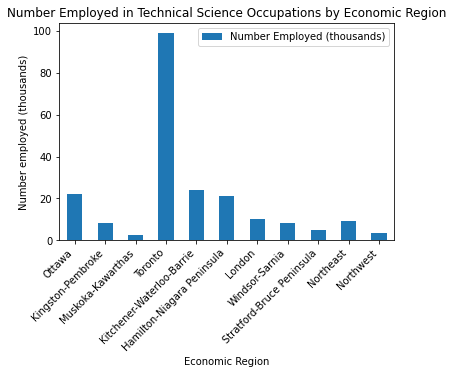

In [12]:
# Plots the number of employees by economic region
employment_filtered.plot(kind='bar', x='Economic region name', y='Number Employed (thousands)')

# Formats the graph
plt.xticks(rotation=45, ha='right')
plt.xlabel("Economic Region")
plt.title('\n'.join(wrap("Number Employed in Technical Science Occupations by Economic Region")))
plt.ylabel("Number employed (thousands)")

# Shows the plot
plt.show()